In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Topologia do sistema
$$V = V_{mag} \cup V_{ext} = V_{mag} \cup V_{gap} \cup V_{leak}$$
$$V_{ext} =  V_{gap} \cup V_{leak}$$
$$V_{gap} \subseteq V_{ext} $$

# Energia magnética

$$ w = \textbf{B}\cdot\textbf{H} $$
$$ W = \int w\cdot dv = \int\textbf{B}\cdot\textbf{H} dv $$


$$ W_{mag} =  -\int_{V_{mag}}\textbf{B}\cdot\textbf{H} dv = \int_{V_{ext}}\textbf{B}\cdot\textbf{H} dv = W_{ext} $$

# Eficiências

## Eficiência Magnética:
Razão entre energia 'gerada' pelo ímã em seu exterior e a energia máxima que este pode 'gerar'. Segundo Jensen & Abel (1996), se $W_{mag} = W_{mag}^{*}$ (se o ímã está operando em seu ponto de operação ótimo), então $\textbf{B} = \frac{\textbf{B}_{rem}}{2}$ e então $W_{mag}^{*} = \frac{\textbf{B}_{rem}^2}{4\mu}$.
Definimos então
$$ \eta_m \equiv 4M \equiv \frac{W_{mag}}{W_{mag}^*} = 4\frac{\int_{V_{ext}}\mu_0|\mathbf{B}\cdot\mathbf{H}|dV}{\int_{V_{mag}}|\mathbf{B_{rem}}|^2dV} = \frac{\int_{V_{ext}}\mathbf{B}\cdot \mathbf{H} dV}{\int_{V_{ext}}(\mathbf{B}\cdot \mathbf{H})_{max} dV}$$

## Eficiência estrutural:
Razão entre a energia magnética no entreferro e a energia total 'gerada' pelo ímã.
$$ \eta_p \equiv \frac{W_{gap}}{W_{ext}} =  \frac{\int_{V_{gap}}\mathbf{B}\cdot \mathbf{H} dV}{\int_{V_{ext}}\mathbf{B}\cdot \mathbf{H} dV} = 1 - \frac{\int_{V_{leak}}\mathbf{B}\cdot \mathbf{H} dV}{\int_{V_{ext}}\mathbf{B}\cdot \mathbf{H} dV}$$

## Eficiência Geral
Razão entre a energia magnética no $\textit{gap}$ e a energia máxima que o ímã pode gerar em seu exterior. 
$$
    \eta = \eta_m \cdot \eta_{p} = \frac{W_{gap}}{W_{gap}^{*}} =  4\frac{\int_{V_{gap}}\mu_0|\mathbf{B}\cdot\mathbf{H}|dV}{\int_{V_{mag}}|\mathbf{B_{rem}}|^2dV} = \frac{\int_{V_{gap}}\mathbf{B}\cdot \mathbf{H} dV}{\int_{V_{gap}}(\mathbf{B}\cdot \mathbf{H})_{max} dV}
$$


# Objetivo:
Para mesmo volume de ímã e entreferro, analisar impacto das geometrias de gap e ímã nas eficiências. Como temos volume fixo e topologia fixa (retangular), temos apenas 2 variáveis a analisar: a altura do gap h_gap e a largura do ímã w_mag.

A | B
- | - 
![alt](image3.png) | ![alt](image4.png)


In [2]:
ef = np.loadtxt('EFICIEINCIAS.txt',skiprows=8)
ef2 = np.loadtxt('horiz.txt',skiprows=8)

In [3]:
ef2 = ef2.reshape(int((len(ef2)/6)),6)

In [4]:
i=0
ef_list = []


for w_mag in np.arange(0.05,0.9,0.02):
    for h_gap in np.arange(0.015,0.09,0.002):
        ef_tuple = [w_mag,h_gap,1,1,ef[i],ef[i+1]]
        ef_list.append(ef_tuple)
        i+=2
ef_array = np.array(ef_list)

In [5]:
ef3 = np.append(ef_array,ef2)
ef3 = ef3.reshape(int((len(ef3)/6)),6)

In [6]:
ef3 = np.transpose(ef3)
ef3 = np.round(ef3,7)

In [7]:
d = {'w_mag':ef3[0],'h_gap':ef3[1],'alpha_mag':ef3[2],'alpha_gap':ef3[3],'Magnetic Efficiency':ef3[4],'Strutural Efficiency':ef3[5]}
df = pd.DataFrame(d)
df['General Efficiency'] = df['Magnetic Efficiency']*df['Strutural Efficiency']
df.sort_values(['General Efficiency'])[df['alpha_gap']==0.75]

C:\Users\Luis Felipe\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,w_mag,h_gap,alpha_mag,alpha_gap,Magnetic Efficiency,Strutural Efficiency,General Efficiency
1648,0.05,0.010,1.00,0.75,0.003406,0.880497,0.002999
1644,0.05,0.010,0.75,0.75,0.004572,0.871459,0.003985
1640,0.05,0.010,0.50,0.75,0.006898,0.861224,0.005941
1664,0.05,0.015,1.00,0.75,0.007022,0.902073,0.006335
1660,0.05,0.015,0.75,0.75,0.009372,0.896255,0.008400
...,...,...,...,...,...,...,...
5444,0.75,0.010,0.25,0.75,0.971978,0.927076,0.901097
4644,0.60,0.015,0.25,0.75,0.999688,0.904847,0.904564
5716,0.80,0.010,0.25,0.75,0.989049,0.929034,0.918860
5988,0.85,0.010,0.25,0.75,0.997967,0.930339,0.928447


# Eficiência magnética
Como podemos observar, para qualquer geometria conseguimos atingir um ponto de operação ótimo.

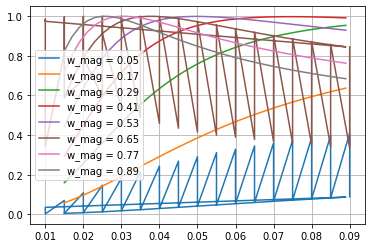

In [8]:
for w in np.round(np.arange(0.05,0.9,0.12),2):
    h_gap = np.asarray(df[df['w_mag']==w]['h_gap'])
    mag_ef = np.asarray(df[df['w_mag']==w]['Magnetic Efficiency'])
    plt.plot(h_gap,mag_ef,label = 'w_mag = {}'.format(w))
plt.legend()
plt.grid()
plt.show()

# Eficiência Estrutural
Como esperado, um gap 'fino' possui alta eficiÊncia estrutural, devido ao menor espraiamento de campo. Ainda, ímãs grossos possuem melhor eficiência, devido À menor dispersão. 


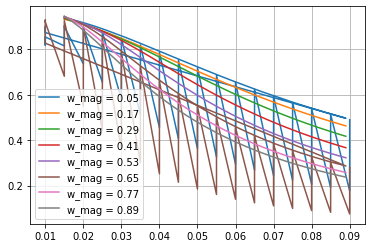

In [9]:
for w in np.round(np.arange(0.05,0.9,0.12),2):
    h_gap = np.asarray(df[df['w_mag']==w]['h_gap'])
    mag_ef = np.asarray(df[df['w_mag']==w]['Strutural Efficiency'])
    plt.plot(h_gap,mag_ef,label = 'w_mag = {}'.format(w))
plt.legend()
plt.grid()
plt.show()

# Eficiência geral

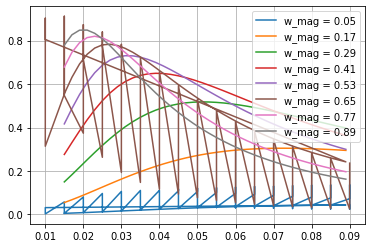

In [10]:
for w in np.round(np.arange(0.05,0.9,0.12),2):
    h_gap = np.asarray(df[df['w_mag']==w]['h_gap'])
    mag_ef = np.asarray(df[df['w_mag']==w]['General Efficiency'])
    plt.plot(h_gap,mag_ef,label = 'w_mag = {}'.format(w))
plt.legend()
plt.grid()
plt.show()

# Otimização topológica do ferro
A otimização do ferro não tem impacto considerável na eficiência magnética. Porém, pode ter bastante impacto na eficiência estrutural.

![""](image1.png)
h_gap = 70, w_mag = 0.3
$\eta_m = 0.96$, $\eta_p = 0.75$

# Exemplo
Para mesmas massas do ímã Halbach Polo, definimos primeiramente algumas restrições de tamanho. A partir disso, podemos chegar nas melhores geometrias possíveis.

![""](image2.png)

h_gap = 30, w_mag = 0.53
$\eta_p = 0.88$

In [11]:
df2 = df.copy()

In [12]:
df2['w_gap'] = 0.0064289*(df['h_gap']**(-1))

In [13]:
df2['dif']=abs(df2['w_gap']-df2['w_mag'])

In [14]:
(df2.sort_values('Magnetic Efficiency'))[df2['dif']<0.2]

C:\Users\Luis Felipe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,w_mag,h_gap,alpha_mag,alpha_gap,Magnetic Efficiency,Strutural Efficiency,General Efficiency,w_gap,dif
6,0.05,0.027,1.00,1.00,0.015359,0.878051,0.013486,0.238107,0.188107
7,0.05,0.029,1.00,1.00,0.017412,0.865412,0.015069,0.221686,0.171686
1713,0.05,0.030,1.00,1.00,0.018632,0.848989,0.015818,0.214297,0.164297
8,0.05,0.031,1.00,1.00,0.019551,0.852854,0.016674,0.207384,0.157384
9,0.05,0.033,1.00,1.00,0.021754,0.839578,0.018264,0.194815,0.144815
...,...,...,...,...,...,...,...,...,...
4644,0.60,0.015,0.25,0.75,0.999688,0.904847,0.904564,0.428593,0.171407
4354,0.55,0.010,0.25,0.25,0.999766,0.846106,0.845908,0.642890,0.092890
5443,0.75,0.010,0.25,0.50,0.999775,0.912383,0.912177,0.642890,0.107110
3571,0.40,0.020,0.25,0.50,0.999785,0.807501,0.807327,0.321445,0.078555


In [15]:
ef2 = np.loadtxt('vert.txt',skiprows=8)

In [16]:
ef2 = ef2.reshape(int((len(ef2)/6)),6)
ef2

array([[0.05      , 0.01      , 0.25      , 0.25      , 0.32211021,
        0.90849247],
       [0.05      , 0.01      , 0.25      , 0.5       , 0.18719973,
        0.90329477],
       [0.05      , 0.01      , 0.25      , 0.75      , 0.13427906,
        0.88516068],
       ...,
       [0.9       , 0.09      , 1.        , 0.5       , 0.13238563,
        0.21625701],
       [0.9       , 0.09      , 1.        , 0.75      , 0.12172647,
        0.23281754],
       [0.9       , 0.09      , 1.        , 1.        , 0.11407433,
        0.23807751]])

In [17]:
ef2 = np.transpose(ef2)
ef2 = np.round(ef2,7)

In [18]:
d = {'w_mag':ef2[0],'h_gap':ef2[1],'alpha_mag':ef2[2],'alpha_gap':ef2[3],'Magnetic Efficiency':ef2[4],'Strutural Efficiency':ef2[5]}
df2 = pd.DataFrame(d)
df2['General Efficiency'] = df2['Magnetic Efficiency']*df2['Strutural Efficiency']
df2

,w_mag,h_gap,alpha_mag,alpha_gap,Magnetic Efficiency,Strutural Efficiency,General Efficiency
0,0.05,0.01,0.25,0.25,0.322110,0.908493,0.292635
1,0.05,0.01,0.25,0.50,0.187200,0.903295,0.169097
2,0.05,0.01,0.25,0.75,0.134279,0.885161,0.118859
3,0.05,0.01,0.25,1.00,0.106027,0.864625,0.091674
4,0.05,0.01,0.50,0.25,0.540794,0.918475,0.496705
...,...,...,...,...,...,...,...
4891,0.90,0.09,0.75,1.00,0.091292,0.230545,0.021047
4892,0.90,0.09,1.00,0.25,0.148466,0.169178,0.025117
4893,0.90,0.09,1.00,0.50,0.132386,0.216257,0.028629
4894,0.90,0.09,1.00,0.75,0.121727,0.232818,0.028340


In [19]:
df2.sort_values(['General Efficiency'])[df2['alpha_gap']==1]

C:\Users\Luis Felipe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,w_mag,h_gap,alpha_mag,alpha_gap,Magnetic Efficiency,Strutural Efficiency,General Efficiency
4627,0.90,0.010,0.25,1.0,0.003791,0.095404,0.000362
4355,0.85,0.010,0.25,1.0,0.004207,0.095066,0.000400
4083,0.80,0.010,0.25,1.0,0.023616,0.018690,0.000441
3811,0.75,0.010,0.25,1.0,0.026084,0.019082,0.000498
3539,0.70,0.010,0.25,1.0,0.000967,0.584952,0.000566
...,...,...,...,...,...,...,...
75,0.05,0.030,0.75,1.0,0.938059,0.878907,0.824467
91,0.05,0.035,0.75,1.0,0.984222,0.851049,0.837622
63,0.05,0.025,1.00,1.0,0.928629,0.907291,0.842536
95,0.05,0.035,1.00,1.0,0.995411,0.854411,0.850490


In [20]:
dft = dft[dft['alpha_mag']==a]
dft
dft.loc[dft['General Efficiency'].idxmax()]

NameError: name 'dft' is not defined

## Variando as áreas
Seja a área $A_m$ a área de ímã inicial (halbach) e $A_g$ á área de gap inicial.


A área utilizada de ímã agora será $A_m \times \alpha_{mag}$ e a de gap será $A_g \times \alpha_{gap}$

Para cada $A_m$ e para cada $A_g$, tomaremos os parâmetros que melhor otimizam a eficiÊncia geral.

Podemos concluir que é bom reduzir os ímãs e aumentar o gap.

In [ ]:
for a1 in [0.25,0.5,0.75,1]:
    a1 = round(a1,2)
    dft = df[df['alpha_gap']==a1]
    for a in [0.25,0.5,0.75,1]:
        a = round(a,2)
        dft2 = dft[dft['alpha_mag']==a]
        print(dft2.loc[dft2['General Efficiency'].idxmax()],'\n\n')

In [ ]:
dt = {}
for a in [0.25,0.5,0.75]:
    dt[a] = max(dft[dft['alpha_mag']==a]['Estrutural Efficiency Efficiency'])
dt

In [ ]:
B[25]

In [ ]:
import pandas as pd
import numpy as np
BH = pd.read_csv('BH_S235JR.csv',delimiter=';')
H = np.asarray(BH['H[A/m]'])[0:25]
B = np.asarray(BH['B [T]'])[0:25]

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 8))
plt.plot(H/1000,B)
plt.xlabel('H [kA/m]',fontsize=20)
plt.ylabel('B [T]',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid()
plt.show()

In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [10]:
ef = np.loadtxt('perfil_campo.txt',skiprows=9).T

In [11]:
x = ef[0]
y = ef[1]
B = ef[2]
theta = ef[3]
theta = np.rad2deg(theta)

No handles with labels found to put in legend.


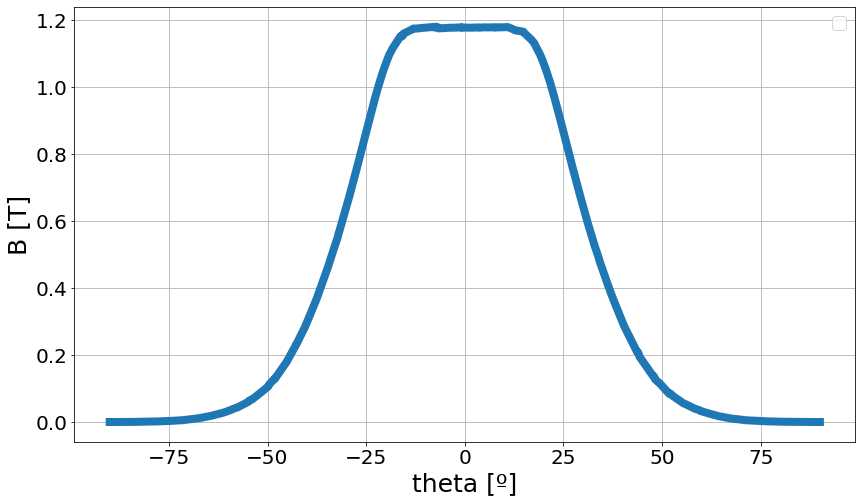

In [12]:
import matplotlib
plt.plot(theta,B,linewidth = 8)
plt.grid()
plt.legend()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 8)
plt.xlabel('theta [º]', fontsize = 25)
plt.ylabel('B [T]', fontsize = 25)
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

plt.savefig('perfil_final.png')
plt.show()

In [13]:
mag_ef = np.loadtxt('mag_ef.txt',skiprows=8)

In [14]:
w_mag = np.array([])
h_mag = np.array([])
w_gap = np.array([])
h_gap = np.array([])
m_ef = np.array([])
est_ef = np.array([])

for i in range(int(len(mag_ef)/6)):
    
    w_mag = np.append(w_mag,mag_ef[0+6*i])
    h_mag = np.append(h_mag,mag_ef[1+6*i])
    w_gap = np.append(w_gap,mag_ef[2+6*i])
    h_gap = np.append(h_gap,mag_ef[3+6*i])
    m_ef = np.append(m_ef,mag_ef[4+6*i])
    est_ef = np.append(est_ef,mag_ef[5+6*i])

In [15]:
w_gap_u = np.unique(w_gap)
h_gap_u = np.unique(h_gap)

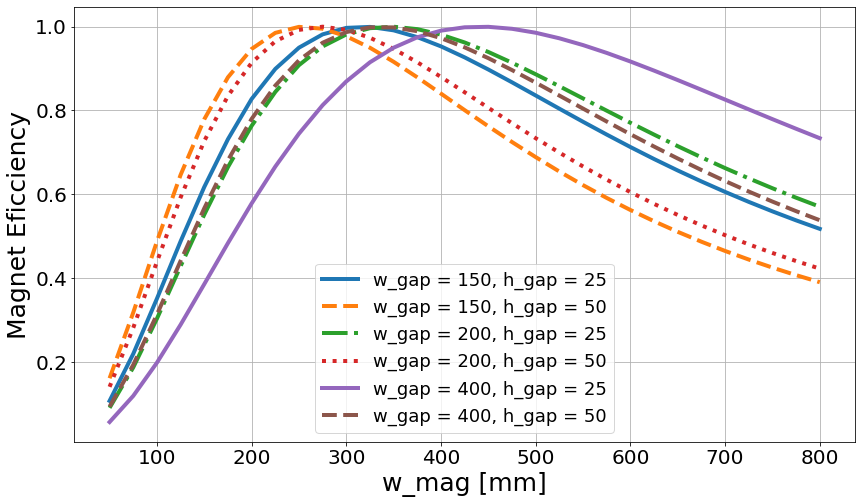

In [20]:
from itertools import cycle
lines = ["-","--","-.",":"]
linecycler = cycle(lines)
for w in w_gap_u:
    for h in h_gap_u:
        
        idx = np.logical_and(h_gap == h, w_gap == w)
        w_m = w_mag[idx]
        ef = m_ef[idx]
        plt.plot(w_m,ef,next(linecycler),label = 'w_gap = %d, h_gap = %d'%(w,h),linewidth = 4)
plt.grid()
plt.legend()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 8)
plt.xlabel('w_mag [mm]', fontsize = 25)
plt.ylabel('Magnet Eficciency', fontsize = 25)
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.savefig('mag_ef_grafico.png')
plt.show()